<a href="https://colab.research.google.com/github/technoboy100/Beginner-Portfolio/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [4]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.shape

(400, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
df.describe()


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [11]:
df['Purchased'].unique ()

array([0, 1])

In [12]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

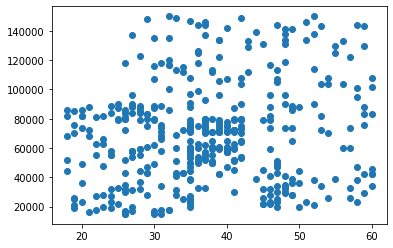

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['EstimatedSalary'])


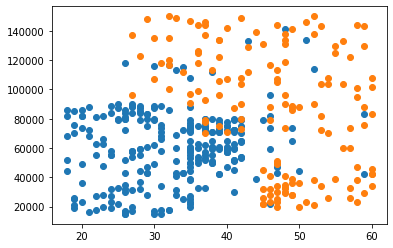

In [15]:
P_0 = df[df['Purchased']==0]
P_1= df[df['Purchased']==1]
plt.scatter(P_0['Age'],P_0['EstimatedSalary'],label='Not Purchased')
plt.scatter(P_1['Age'],P_1['EstimatedSalary'],label='Purchased')


In [71]:
X=df.iloc[:,2:4].values
y=df.iloc[:,4].values
type(y)

numpy.ndarray

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)


In [74]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(280, 2)
(120, 2)
(280,)
(120,)


In [75]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [76]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
model.score(X_train,y_train)

0.8321428571428572

In [87]:
predictions=model.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [88]:
accuracy_score(predictions,y_test)

0.8666666666666667

In [89]:
print(confusion_matrix(predictions,y_test))

[[77 10]
 [ 6 27]]


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


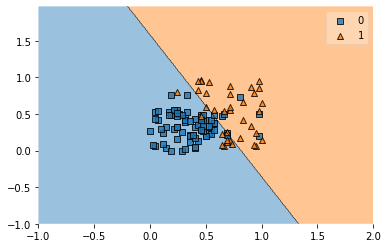

In [91]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test,y_test,clf=model)

In [84]:
def sigmoid(x1):
  return 1/(1+np.exp(-x1))

In [66]:
sigmoid(X_test)

array([[0.63909275, 0.59154847],
       [0.61120518, 0.60224182],
       [0.63909275, 0.63542356],
       [0.66607285, 0.55898334],
       [0.5297268 , 0.56080862],
       [0.72159375, 0.51481048],
       [0.62245933, 0.549834  ],
       [0.66607285, 0.55166677],
       [0.59983122, 0.58076776],
       [0.62245933, 0.60224182],
       [0.63358302, 0.58076776],
       [0.5474756 , 0.68199668],
       [0.72635167, 0.70095547],
       [0.71678537, 0.52035911],
       [0.66075637, 0.51481048],
       [0.61684791, 0.60224182],
       [0.5592442 , 0.63026022],
       [0.53565367, 0.57896316],
       [0.5709466 , 0.5       ],
       [0.62245933, 0.68838774],
       [0.55336737, 0.57172409],
       [0.51784955, 0.60401489],
       [0.61120518, 0.60931754],
       [0.72635167, 0.63198472],
       [0.72159375, 0.55898334],
       [0.61120518, 0.57353687],
       [0.61684791, 0.58076776],
       [0.61120518, 0.72519331],
       [0.67134745, 0.53328404],
       [0.60553249, 0.53328404],
       [0.

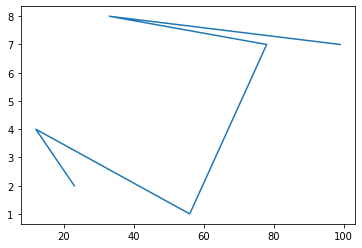

In [55]:
import numpy as np
a =np.array([23,12,56,78,33,99])
b =np.array([2,4,1,7,8,7])
plt.plot(a,b)


In [60]:
a_norm=(a-np.min(a))/(np.max(a)-np.min(a))
b_norm=(b-np.min(b))/(np.max(b)-np.min(b))

In [61]:
df.iloc[:,2:4]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000
